# Labeling - based on stationary close

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')
import pandas as pd
import numpy as np
import os
from pathlib import Path

In [2]:
def load_data(root=None, remove=None, headers=None):
    data = Path('./OmegaDev/Model_Z/raw_data/GBP_USD_H1_2016-01-01_2018-01-01.csv') if root is None else Path(root)
    headers = ['date', 'complete', 'open', 'high', 'low', 'close', 'volume'] if headers is None else headers
    df = pd.read_csv(data, header=None, names=headers)
    return df

In [3]:
df = load_data()

In [4]:
df.head()

,date,complete,open,high,low,close,volume
0,2016-01-03T22:00:00,True,1.47352,1.47464,1.47351,1.47354,1068
1,2016-01-03T23:00:00,True,1.47343,1.47382,1.47266,1.47356,938
2,2016-01-04T00:00:00,True,1.47364,1.47412,1.47240,1.47278,570
3,2016-01-04T01:00:00,True,1.47284,1.47301,1.46936,1.47177,1133
4,2016-01-04T02:00:00,True,1.47183,1.47234,1.47041,1.47184,865


In [5]:
df['close'].diff().iloc[:5].std()

0.000551150312225828

In [8]:
def vol_label(start_idx, df, window=4, threshold_l=0.7, threshold_u=0.7):
    """
    args:
    -----------------
        stard_idx: <int> the start index should be the last idx of the time-sequence we are using as predicted features (independent vars).
                   if our time-series is from [0,1,2,3,4] then our start_idx should be 5 so our prediction label will be: [5, ... ,window]
                   therefore, the start_idx should be be the last_idx of our time-series window
        
        df:        <df> dataframe for predicting
        
        threshold: <float> threshold for labels, test different values, along with dynamic values
    """
    tf = df.iloc[start_idx:start_idx+window]['close']
    vol = tf.diff(1).std()
    price_n = tf.iloc[0]
    upper_bound = price_n + vol * threshold_u
    lower_bound = price_n - vol * threshold_l
    lbls = []
    for c in tf.values:
        if c >= upper_bound: lbls.append(1)
        elif c <= lower_bound: lbls.append(-1)
    return lbls[0] if len(lbls) > 1 else 0

In [12]:
def vol_label_show(start_idx, df, y_col, window=4, threshold_l=0.7, threshold_u=0.7):
    """
    args:
    -----------------
        stard_idx: <int> the start index should be the last idx of the time-sequence we are using as predicted features (independent vars).
                   if our time-series is from [0,1,2,3,4] then our start_idx should be 5 so our prediction label will be: [5, ... ,window]
                   therefore, the start_idx should be be the last_idx of our time-series window
        
        df:        <df> dataframe for predicting
        
        threshold: <float> threshold for labels, test different values, along with dynamic values
    """
    tf = df.iloc[start_idx:start_idx+window][y_col]
    vol = tf.diff(1).std()
    price_n = tf.iloc[0]
    upper_bound = price_n + vol * threshold_u
    lower_bound = price_n - vol * threshold_l
    lbls = []
    for c in tf.values:
        if c >= upper_bound: lbls.append(1)
        elif c <= lower_bound: lbls.append(-1)
    plt.plot(tf.values)
    plt.plot(np.full(window, upper_bound))
    plt.plot(np.full(window, lower_bound))
    return lbls[0] if len(lbls) > 0 else 0

1

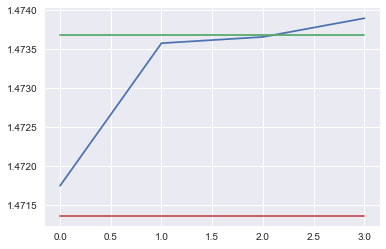

In [39]:
vol_label_show(5, df, 'close', window=4, threshold_u=2, threshold_l=0.4)

In [42]:
(1.4740 - 1.4720) / 0.0001

20.000000000000018

In [45]:
def pip_calc(start_idx, df, y_col, window=4):
    tf = df.iloc[start_idx:start_idx+window][y_col]
    price_n = tf.iloc[0]
    price_m = tf.iloc[-1]
    pips = (price_m-price_n) / 0.0001
    return pips

In [47]:
pip_calc(5, df, 'close', window=4)

21.500000000000963

In [50]:
def vol_label_show(start_idx, df, y_col, window=4, sl_pips=20, tp_pips=40):
    """
    args:
    -----------------
        stard_idx: <int> the start index should be the last idx of the time-sequence we are using as predicted features (independent vars).
                   if our time-series is from [0,1,2,3,4] then our start_idx should be 5 so our prediction label will be: [5, ... ,window]
                   therefore, the start_idx should be be the last_idx of our time-series window
        
        df:        <df> dataframe for predicting
        
        sl_pips & tp_pips: stop loss pips and take profit pips
    """
    tf = df.iloc[start_idx:start_idx+window][y_col]
    price_n = tf.iloc[0]
    upper_bound = price_n + (0.0001 * tp_pips)
    lower_bound = price_n - (0.0001 * sl_pips)
    lbls = []
    for c in tf.values:
        if c >= upper_bound: lbls.append(1)
        elif c <= lower_bound: lbls.append(-1)
    plt.plot(tf.values)
    plt.plot(np.full(window, upper_bound))
    plt.plot(np.full(window, lower_bound))
    return lbls[0] if len(lbls) > 0 else 0

1

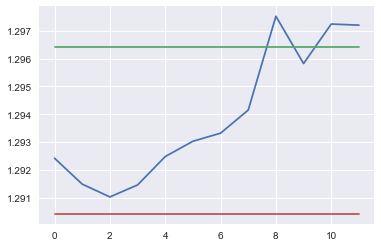

In [143]:
vol_label_show(10373, df, 'close', window=12)

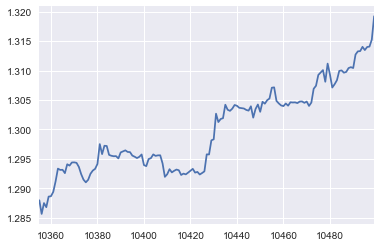

In [108]:
df.iloc[10355:10500]['close'].plot()